In [9]:
# Some Jupyter Magic for inline charts
%matplotlib inline 

# Basic Visualization with Matplotlib
We will now look at how to use Matplotlib to help us visualize our experiments. Matplotlib can be used for both personal edification as well as to make charts suitable for publication. In this notebook we will cover a few of the basics. Matplotlib and, specifically, PyPlot, are incredibly deep resources that will allow you to make the most complicated charts your heart desires. 

Because of the depth of the topic, we don't have time to cover every possible piece of Matplotlib functionality, but we will cover the basics, here. If you have worked with Matlab before, then this section should seem familar to you. If not, then we hope that this notebook will be a jumping off point for your own visualizations.

The most common module of Matplotlib you will be interfacing with is PyPlot. PyPlot contains the majority of functionality we'll be using in this notebook. For the full documentation of PyPlot, [please see the documentation](http://matplotlib.org/2.0.0/contents.html).

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## The Basic Plot
The most basic and common piece of functionality is creating a simple x-y chart. This kind of chart represents the overwhelming majority of figures you see in publication. Lets take a look at this most basic of charts and learn a bit about Matplotlib & PyPlot along the way.

In [24]:
# Define an axis of time
t  = np.linspace(0,10,1000)  # 1,000 evenly spaced points between [0,10]
# Define some value x(t)
xt = np.sin(t) + 0.1*np.sin(t*40)

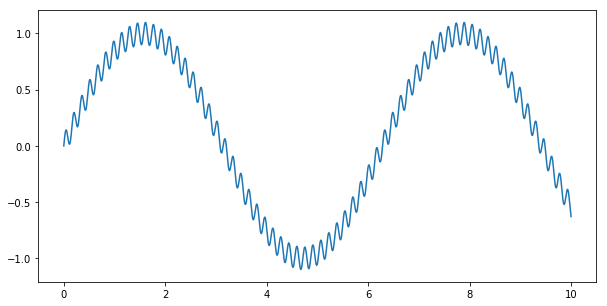

In [25]:
plt.figure(figsize=(10,5))   # Specify dimensions of the figure in (width,height)
plt.plot(t,xt)               # The most basic chart  !

It is that simple ! You've made your first chart ! Of course, there are a lot of other options that we can make in order to get this chart up to publication quality. Lets take a look at some of those options, now.

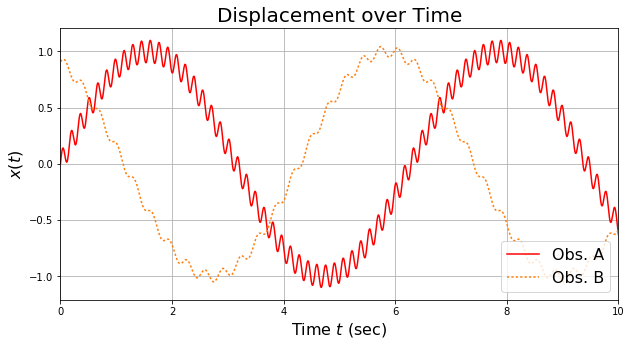

In [84]:
plt.figure(figsize=(10,5))   # Specify dimensions of the figure in (width,height)
ha = plt.plot(t,xt, label = 'Obs. A')  #  Save a copy of the plot handle

# Create some labels for the axes. You can use TeX !
plt.xlabel('Time $t$ (sec)', fontsize=16)
plt.ylabel('$x(t)$', fontsize=16)
plt.title('Displacement over Time', fontsize=20)

# Tighten the boundaries to get rid of white-space
plt.xlim([0,10])

# Do you want a grid?
plt.grid('on')

# We can re-draw features of the line after-the-fact using the plot handle
plt.setp(ha,color='r')    # Notice that this doesn't update the legend.

# We can even include another line if we feel like it
xtB = np.sin(t+2) + 0.05*np.sin(t*20)
hb = plt.plot(t,xtB,':', label='Obs. B')

# Insert a legend ! 
plt.legend(fontsize=16, loc=4)

# You can save this to disk, as well.
plt.savefig('my_first_plot.pdf', dpi=300, orientation='landscape', bbox_inches='tight')

You've done it ! You've made your first beautiful plot and saved it to disk. It only gets "better" from here.

## Visualizing Data
Lets return to our friend Yves and take a look at that `StochasticClimber` dataset. We were able to run the climber, but unfortunately, there was nothing interesting to look at. Lets see how Yves did on his climbing trip. 

First, we need to re-load the dataset. We can accomplish this easily via the pickle we saved or the CSV. Here, we will go ahead and use the CSV and load it through pandas.

In [186]:
import pandas as pd

# Load the CSV dataset... simple !
yvesDF = pd.read_csv('yves.csv')
yvesDF

,x,y,z
0,0.00,0.00,0.000000
1,0.05,0.00,0.014171
2,0.00,0.00,0.011660
3,0.05,0.00,0.014171
4,0.00,0.00,0.011660
5,0.00,0.05,0.014171
6,0.05,0.05,0.017222
7,0.00,0.05,0.014171
8,-0.05,0.05,0.011544
9,-0.05,0.00,0.009499


As we see above, Jupyter already has some nice display features for Pandas DataFrames (here, it displays it as a table). So, where did Yves go on his journey? Lets take a top-down view and visualize all his wandering.

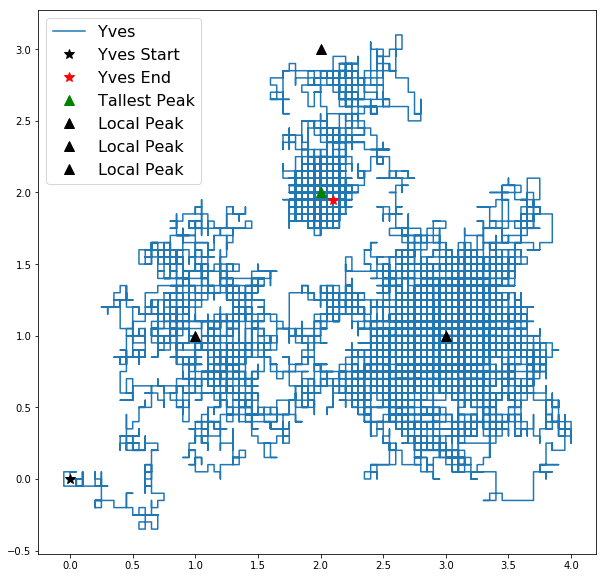

In [187]:
plt.figure(figsize=(10,10))

# Show Yves' Path
plt.plot(yvesDF['x'],yvesDF['y'],label='Yves')

# Show his starting and ending points
plt.plot(0,0,'*k',markerfacecolor='k',markersize=10, label='Yves Start')
plt.plot(yvesDF['x'][-1:],yvesDF['y'][-1:],'*r',markerfacecolor='r',markersize=10, label='Yves End')

# Show the true peaks
plt.plot(2,2,'^g',markerfacecolor='g',markersize=10, label='Tallest Peak')
plt.plot(1,1,'^k',markerfacecolor='k',markersize=10, label='Local Peak')
plt.plot(3,1,'^k',markerfacecolor='k',markersize=10, label='Local Peak')
plt.plot(2,3,'^k',markerfacecolor='k',markersize=10, label='Local Peak')

plt.legend(loc=2,fontsize=16)

So now we have a pretty cool chart detailing everywhere Yves went on the map. 

But can we get an idea of how long he has spent in certain locations ? One quick and dirty way is to change the line width. When the line width is below `1`, then it includes a transparency effect. This transparency compounds as the plot line cross itself. 

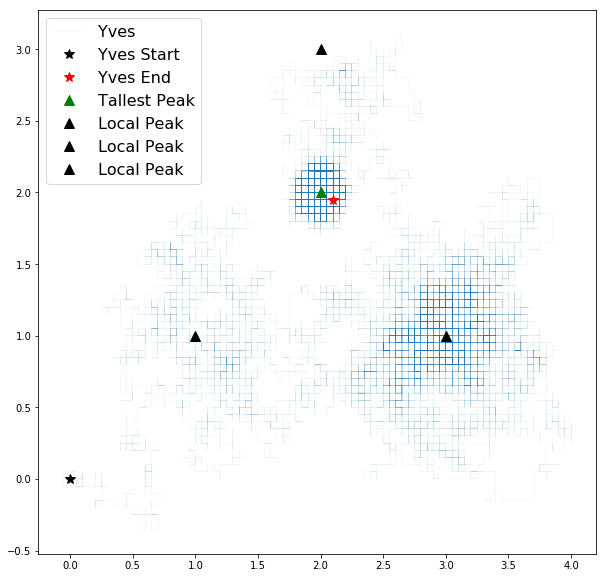

In [188]:
plt.figure(figsize=(10,10))

# Show Yves' Path
plt.plot(yvesDF['x'],yvesDF['y'],label='Yves', linewidth=0.05)

# Show his starting and ending points
plt.plot(0,0,'*k',markerfacecolor='k',markersize=10, label='Yves Start')
plt.plot(yvesDF['x'][-1:],yvesDF['y'][-1:],'*r',markerfacecolor='r',markersize=10, label='Yves End')

# Show the true peaks
plt.plot(2,2,'^g',markerfacecolor='g',markersize=10, label='Tallest Peak')
plt.plot(1,1,'^k',markerfacecolor='k',markersize=10, label='Local Peak')
plt.plot(3,1,'^k',markerfacecolor='k',markersize=10, label='Local Peak')
plt.plot(2,3,'^k',markerfacecolor='k',markersize=10, label='Local Peak')

plt.legend(loc=2,fontsize=16)

So, we see that the final effect is a "density", which shows us that Yves spends most of his time around the peaks. 

We can even make some 3D plots. For example, what if we wanted to plot Yves' path along with his height, so we can get an idea of the steepness of the mountains he climbed. We can do that as well by specifying a 3D axis.

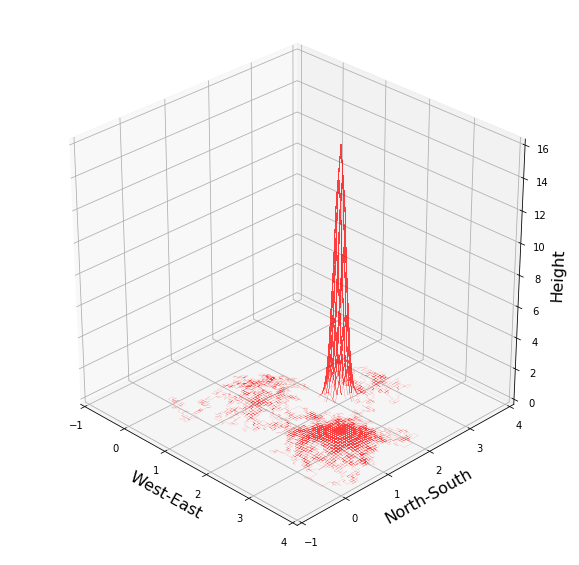

In [189]:
# Import some extra tools
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
# Set a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Use the 3D axis for plotting
ax.plot(yvesDF['x'], yvesDF['y'], yvesDF['z'], 'r', linewidth=0.1, alpha=0.75)
ax.set_xlabel('West-East', fontsize=16)
ax.set_ylabel('North-South', fontsize=16)
ax.set_zlabel('Height', fontsize=16)
plt.xlim((-1,4))
plt.ylim((-1,4))
ax.view_init(30, -45)

We can even look at where Yves lingered the most in terms of his (x,y) position.

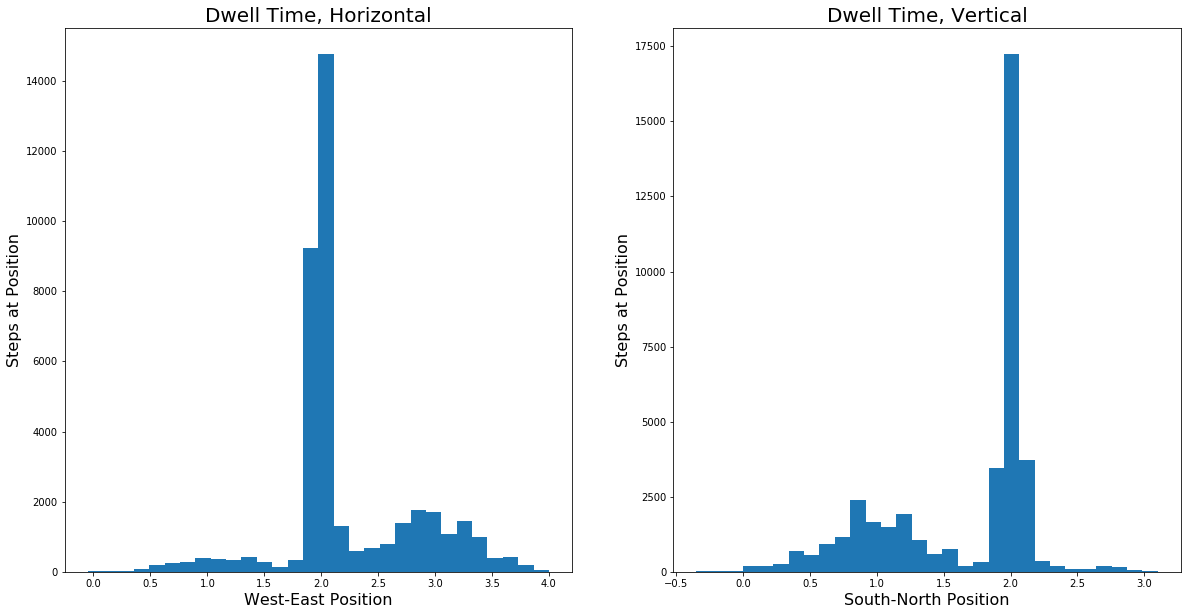

In [190]:
plt.figure(figsize=(20,10))
# Histogram of X locations
plt.subplot(121)
plt.hist(yvesDF['x'], bins = 30);
plt.xlabel('West-East Position', fontsize=16)
plt.title('Dwell Time, Horizontal', fontsize=20)
plt.ylabel('Steps at Position', fontsize=16)

plt.subplot(122);
plt.hist(yvesDF['y'], bins = 30);
plt.xlabel('South-North Position', fontsize=16)
plt.ylabel('Steps at Position', fontsize=16)
plt.title('Dwell Time, Vertical', fontsize=20)


So, we can see that indeed Yves has spent the majority of his time around the tallest peak. But, once he got there, did he stay there? 

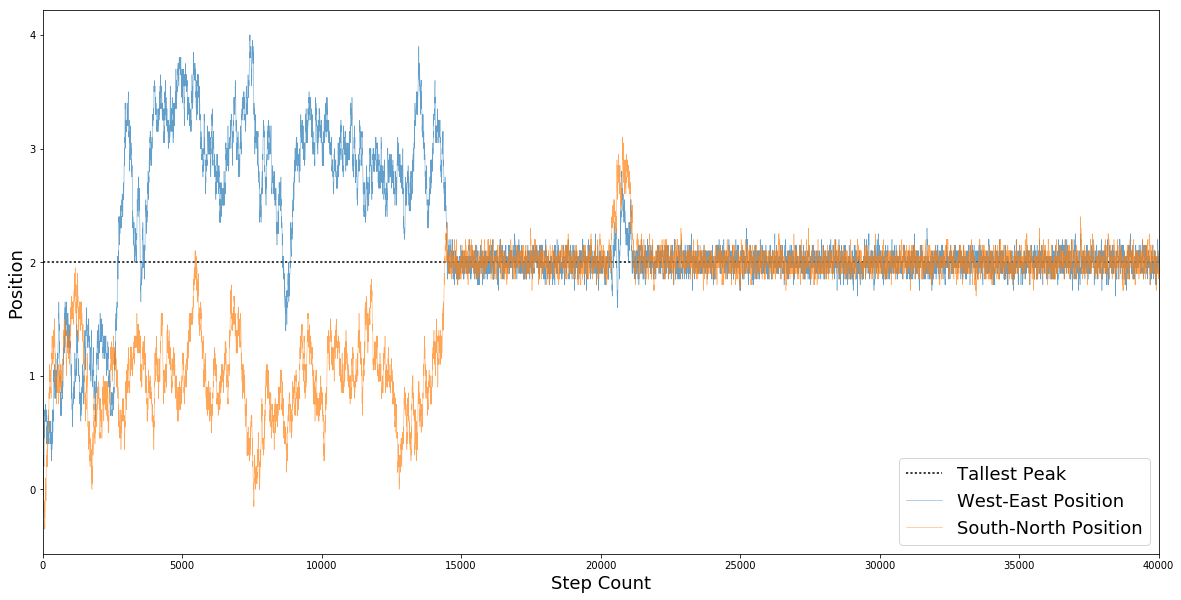

In [191]:
# Get the number of steps Yves took
maxstep = len(yvesDF['x'])

plt.figure(figsize=(20,10))

# Plot the position of the true tallest peak
plt.plot([0, maxstep],[2, 2],':k', label='Tallest Peak')

# Plot Yves Path
plt.plot(yvesDF['x'], linewidth=0.5, label='West-East Position', alpha=0.7)
plt.plot(yvesDF['y'], linewidth=0.5, label='South-North Position', alpha=0.7)

# Formatting
plt.xlim([1,maxstep])
plt.xlabel('Step Count', fontsize=18)
plt.ylabel('Position', fontsize=18)
plt.legend(loc=4, fontsize=18)

Or, another way, we can look at Yves' distance from the tallest peak, as well.

(0, 3)

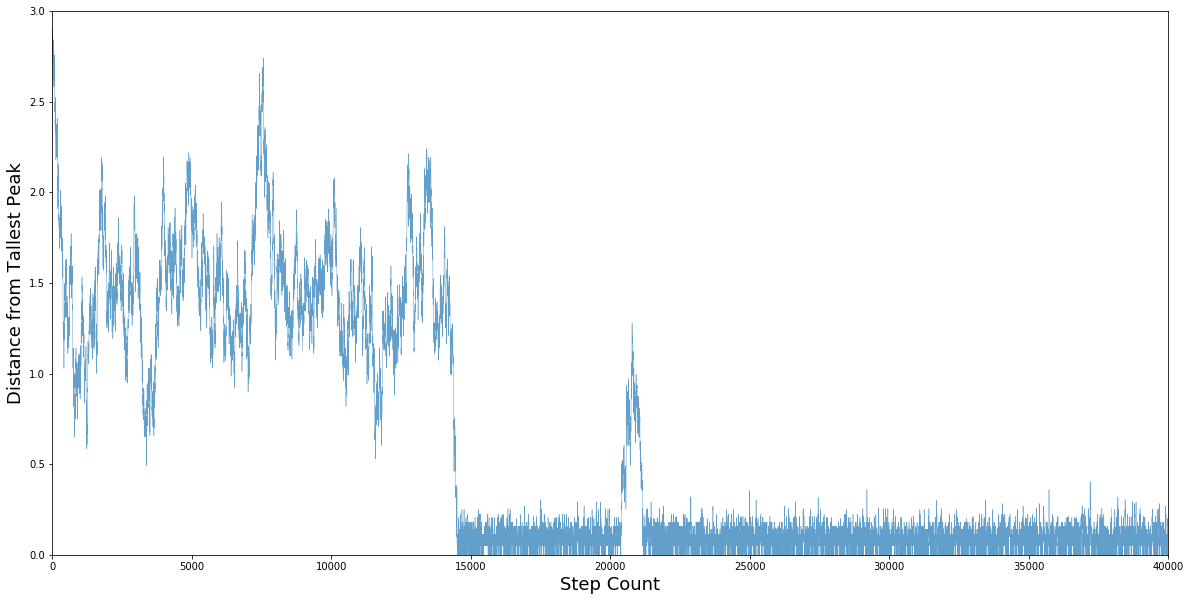

In [192]:
# Calculate Euclidean distance from peak
d = np.sqrt((yvesDF['x'] - 2)**2 + (yvesDF['y'] - 2)**2)

plt.figure(figsize=(20,10))

# Plot Yves Path
plt.plot(d, linewidth=0.5,  alpha=0.7)

# Formatting
plt.xlim([1,maxstep])
plt.xlabel('Step Count', fontsize=18)
plt.ylabel('Distance from Tallest Peak', fontsize=18)
plt.ylim([0,3])

We can see that by the end Yves remains quite close to the tallest peak. It seems that once he gets there, he stays around there. But why do we see this variation around the central value? Well, remember that we selected a grid size of 0.05. We should expect to see this 'grid-width' variation around the peak. Lets check it !

In [193]:
np.sqrt(np.var(d[25000:]))

0.051961986664900039

Indeed, we recover a variance here at around ~0.05 +- 0.01. So we can indeed see that Yves is mostly travelling in tight loops around the top of the tallest mountain peak ! It seems his stochastic strategy paid off :)